In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
import uproot
import awkward as ak
'''
plt.clf()
plt.style.use('classic')
plt.close('all')
'''

"\nplt.clf()\nplt.style.use('classic')\nplt.close('all')\n"

In [2]:
events = uproot.open('GluGluToH_HToJPsiG_JPsiToMuMu_TuneCP5_13TeV-madgraph-pythia8_RunIISummer20UL16_Skim.root')['Events']
events

<TTree 'Events' (1460 branches) at 0x00010dbe2970>

In [3]:
muon_pt = events["Muon_pt"].array()
muon_eta = events["Muon_eta"].array()

nmuons = ak.num(muon_pt, axis = 1)
nevents = len(nmuons)

print("Muon_pt: ", muon_pt)
print("Number of muons: ", nmuons)
print("Number of events: ", nevents)

Muon_pt:  [[48.2, 12.5], [51.3, 12.5, 3.81], [36.1, ... 45.3, 13.6], [32.8, 12.7], [27, 17.1]]
Number of muons:  [2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, ... 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
Number of events:  521


TypeError: histplot() got multiple values for argument 'bins'

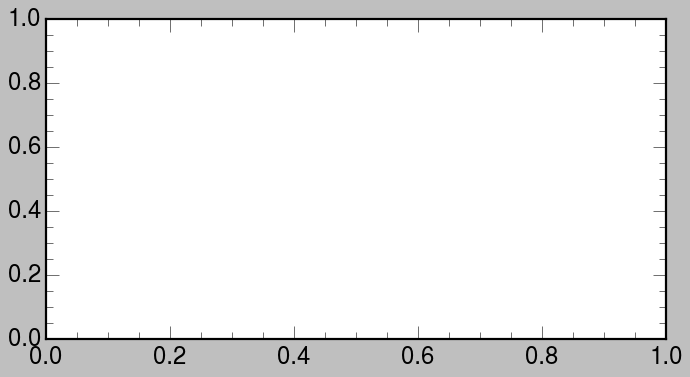

In [91]:
pt_min = 0
pt_max = 100
nbins = 64

bins = np.linspace(pt_min, pt_max, nbins)



fig, ax = plt.subplots(figsize=(10, 5))
hep.histplot(
    muon_pt,
    bins = bins,
    histtype = "fill",
    color = "b",
    alpha = 0.5,
    edgecolor="black",
    label = r"ZZ $\rightarrow$ 4l",
    ax = ax,
)

ax.set_xlabel("4l invariant mass (GeV)", fontsize=15)
ax.set_ylabel("Events / 3 GeV", fontsize=15)
ax.set_xlim(pt_min, pt_max)
ax.legend()
fig.show()


In [56]:
selected_muons
plt.hist(selected_muons)

NameError: name 'plt' is not defined

In [22]:
# FILE TO BE ANALYZED #
f = r.TFile.Open("GluGluToH_HToJPsiG_JPsiToMuMu_TuneCP5_13TeV-madgraph-pythia8_RunIISummer20UL16_Skim.root", "READ")
tree = f.Get("events")
n = tree.GetEntries()

In [35]:
data = []
h = r.TH1F("h", "h", 100, 0, 50)
for i in range(n):
    tree.GetEntry(i)
    #data.append(tree.Muon_pt)
    h.Fill(tree.Muon_pt)


TypeError: none of the 3 overloaded methods succeeded. Full details:
  int TH1::Fill(double x) =>
    TypeError: could not convert argument 1 (must be real number, not cppyy.LowLevelView)
  int TH1::Fill(const char* name, double w) =>
    TypeError: takes at least 2 arguments (1 given)
  int TH1::Fill(double x, double w) =>
    TypeError: takes at least 2 arguments (1 given)

In [34]:
h = r.TH1F("histo", "My histogram", 100, -5.0, 5.0)
for entry in tree:
       print(entry.Muon_pt)
       h.Fill( entry.Muon_pt )
h.Write()

TypeError: none of the 3 overloaded methods succeeded. Full details:
  int TH1::Fill(double x) =>
    TypeError: could not convert argument 1 (must be real number, not cppyy.LowLevelView)
  int TH1::Fill(const char* name, double w) =>
    TypeError: takes at least 2 arguments (1 given)
  int TH1::Fill(double x, double w) =>
    TypeError: takes at least 2 arguments (1 given)

Warning in <TFile::Append>: Replacing existing TH1: histo (Potential memory leak).


(array([[0., 0., 1., ..., 0., 0., 1.],
        [0., 1., 1., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 1.],
        ...,
        [0., 0., 1., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 1.]]),
 array([ 3.1614652,  7.6609125, 12.160359 , 16.659807 , 21.159254 ,
        25.6587   , 30.158148 , 34.657597 , 39.157043 , 43.65649  ,
        48.155937 ], dtype=float32),
 <a list of 521 BarContainer objects>)

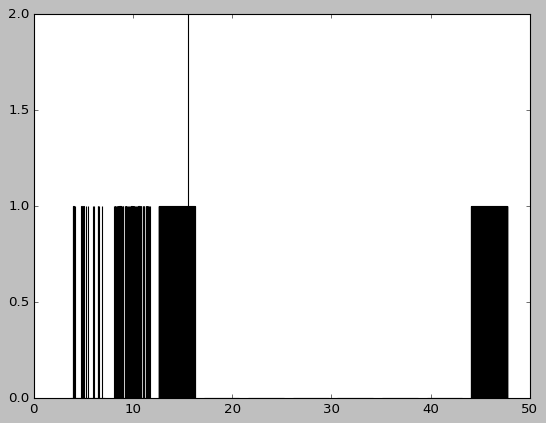

In [31]:
plt.hist(data)

In [ ]:
df = r.RDataFrame("Events", f)
#df = df.Define("z", "sqrt(TauE*TauE - TauPt*TauPt)")

df.Snapshot('tree', 'df032_MakeNumpyDataFrame.root')

: 

: 

In [16]:
bins = 256
muon_pt = r.TH1I("hist", "", bins, 0, bins)

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


In [17]:
for entry in tree:
    # Now you have acess to the leaves/branches of each entry in the tree, e.g.
    events = entry.Muon_pt

    muon_pt.Fill(events)

TypeError: none of the 3 overloaded methods succeeded. Full details:
  int TH1::Fill(double x) =>
    TypeError: could not convert argument 1 (must be real number, not cppyy.LowLevelView)
  int TH1::Fill(const char* name, double w) =>
    TypeError: takes at least 2 arguments (1 given)
  int TH1::Fill(double x, double w) =>
    TypeError: takes at least 2 arguments (1 given)

In [159]:
Muon_pt.Rebin(4)
Muon_pt.GetXaxis().SetRangeUser(xMin, xMax)

In [15]:
c1 = r.TCanvas("c1", "", 800, 600)
tree.Muon_pt.Draw()
c1.Draw()

AttributeError: 'cppyy.LowLevelView' object has no attribute 'Draw'

In [161]:
if "60Co" in fileName:
    xval = [1172, 1332]
if "133Ba" in fileName:
    xval = [276.4, 302.85, 356.02, 383.8]
if "22Na" in fileName:
    xval = [511, 1275]
if "137Cs" in fileName:
    xval = [662]

npeaks = len(xval)
resolution = np.zeros(npeaks)
mean = np.zeros(npeaks)
sigma = np.zeros(npeaks)
umean = np.zeros(npeaks)
usigma = np.zeros(npeaks)

In [162]:
ss = r.TSpectrum(npeaks)
nfound = ss.Search(h, 10, "new", 0.1)
print("\n --------- Found ", nfound, " peaks ---------")
xpeaks = ss.GetPositionX()


 --------- Found  2  peaks ---------


Warning in <TSpectrum::SearchHighRes>: Peak buffer full


In [163]:
for i in range(npeaks):
    xp = xpeaks[i]
    print(" ************ Peak at: ", xp, "\n")
    fun1 = r.TF1("fun1name", "gaus", xp - 30, xp + 30)
    h.Fit(fun1,"RQN")
    fun2 = r.TF1("fun2name", "gaus", fun1.GetParameter(1) - 1.5 * fun1.GetParameter(2), fun1.GetParameter(1) + 1.5 * fun1.GetParameter(2))
    h.Fit(fun2, "R+")
    mean[i] = fun2.GetParameter(1)
    sigma[i] = fun2.GetParameter(2)
    umean[i] = fun2.GetParErrors()[1]
    usigma[i] = fun2.GetParErrors()[2]

    resolution[i]=((2.35 * sigma[i]) / mean[i]) * 100;
    print("\nRESULTS:  Mean at: ", mean[i], " with sigma ", sigma[i], ", FWHM of ", 2.35 * sigma[i], ", and resolution of ", resolution[i], " %\n")

 ************ Peak at:  1382.0 


RESULTS:  Mean at:  1382.5960532133765  with sigma  23.187880352763614 , FWHM of  54.491518828994494 , and resolution of  3.9412465197153863  %

 ************ Peak at:  1578.0 


RESULTS:  Mean at:  1576.3305956928568  with sigma  23.694266000929385 , FWHM of  55.68152510218406 , and resolution of  3.532350717186323  %

 FCN=18.0726 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=3.56629e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.57147e+03   2.00062e+01   2.70278e-02  -3.69851e-06
   2  Mean         1.38260e+03   1.77351e-01   7.08795e-05  -1.78742e-04
   3  Sigma        2.31879e+01   2.35169e-01  -4.67533e-06   1.12391e-02
 FCN=4.71708 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=2.69197e-

In [164]:
sol = so.curve_fit(resolution_fit, xval, resolution, sigma = 2.35 * usigma / mean, absolute_sigma = True, maxfev = 300)
coef, cov = sol
a, b = coef; ua, ub = np.sqrt(np.diag(cov))

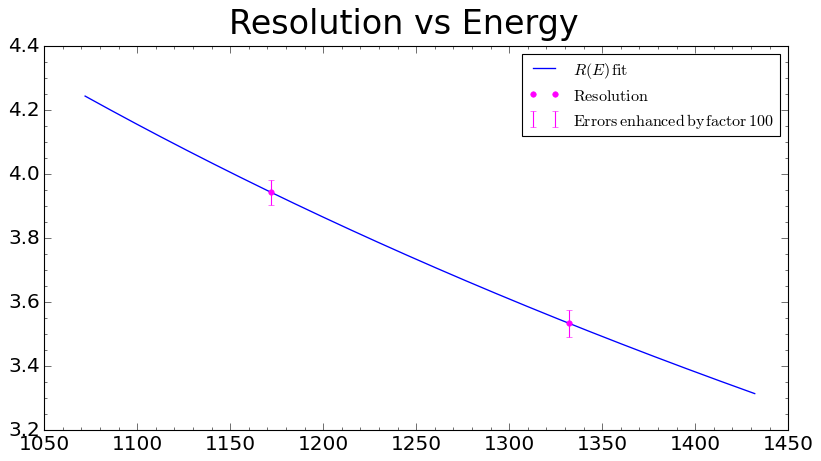

In [166]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [12, 6]
plt.suptitle("Resolution vs Energy", fontsize = 30)
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)

enh_errors = 100
xaux = np.linspace(xval[0] - 100, xval[-1] + 100, 1000)
ax.plot(xaux, resolution_fit(xaux, *coef), color = 'blue', linewidth = 1.2, linestyle = 'solid', label = '$R(E)\, {\\rm fit}$')
ax.plot(xval, resolution, marker = 'o', markersize = 5, markeredgecolor = "magenta", color = "magenta", lw = 0, label = "${\\rm Resolution}$")
ax.errorbar(xval, resolution, yerr = 100 * 2.35 * usigma / mean, capsize = 3., elinewidth = 1., lw = 0, color = "magenta", label = "${\\rm Errors\, enhanced\, by\, factor}\, %i$" % enh_errors)
ax.legend(loc = "best")


In [167]:
res_at_one25 = resolution_fit(1250., *coef)
print("\n ************** RESOLUTION @ 1.25 MeV:  ", res_at_one25, "% ************** \n")


 ************** RESOLUTION @ 1.25 MeV:   3.732100883510315 % ************** 



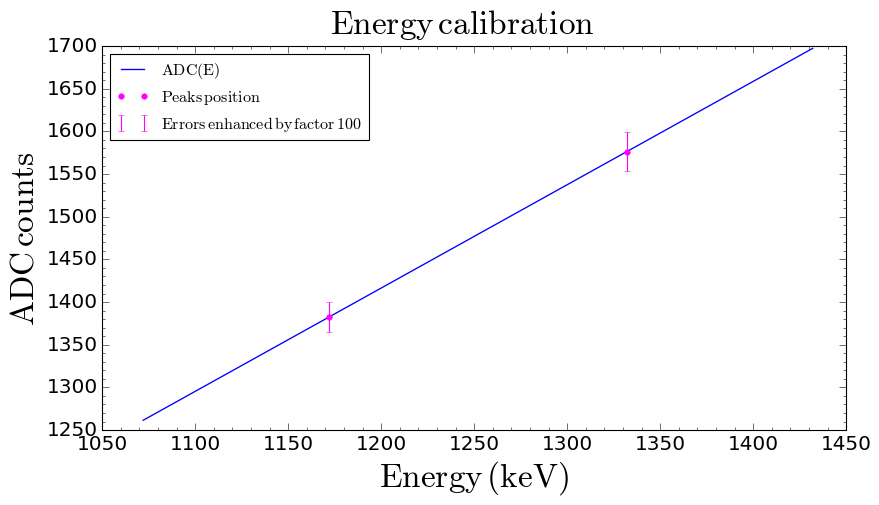

In [168]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [12, 6]
plt.suptitle("${\\rm Energy\, calibration}$", fontsize = 30)
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_xlabel("${\\rm Energy\, (\mathrm{keV})}$", fontsize = 30)
ax.set_ylabel("${\\rm ADC\, counts}$", fontsize = 30)

sol = so.curve_fit(linear, xval, mean, sigma = sigma, absolute_sigma = True)
coef, cov = sol
a, b = coef; ua, ub = np.sqrt(np.diag(cov))

enh_errors = 100
ax.plot(xaux, linear(xaux, *coef), color = 'blue', linewidth = 1.2, linestyle = 'solid', label = '${\\rm ADC(E)}$')
ax.plot(xval, mean, marker = 'o', markersize = 5, markeredgecolor = "magenta", color = "magenta", lw = 0, label = "${\\rm Peaks\, position}$")
ax.errorbar(xval, mean, yerr = enh_errors * umean, capsize = 3., elinewidth = 1., lw = 0, color = "magenta", label = "${\\rm Errors\, enhanced\, by\, factor}\, %i$" % enh_errors)
ax.legend(loc = "best")


In [169]:
hcal = r.TH1I("hist_cal", "Calibrated spectrum", bins, 0, bins)

for entry in tree:         
     hcal.Fill(inv_linear(entry.Energy, *coef))
hcal.Rebin(4)

hcal.GetXaxis().SetRangeUser(inv_linear(xMin, *coef), inv_linear(xMax, *coef))
hcal.GetXaxis().SetTitle("Photon energy [keV]");
hcal.GetYaxis().SetTitle("counts / %1.2f keV" % hcal.GetXaxis().GetBinWidth(0))

In [170]:
c2 = r.TCanvas("c2", "", 800, 600)
hcal.Draw()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [171]:
try:
    os.makedirs(analysis_dir + date)
except FileExistsError:
    # directory already exists
    pass

with open(analysis_dir + date + fileName + "_cal.csv", 'w') as f:
    for i in range(npeaks):
        f.write(",%i peak" % xval[i])
    f.write("\n")
    f.write("Resolution (per cent)")
    for i in range(npeaks):
        f.write(",%.3f" % resolution[i])
f.close()

In [172]:
os.remove(output) # deleting the file once we have done the analysis